In [1]:
# univariate lstm example
import pandas as pd
import numpy as np 
import datetime
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

Date      datetime64[ns]
Period             int64
Value            float64
dtype: object


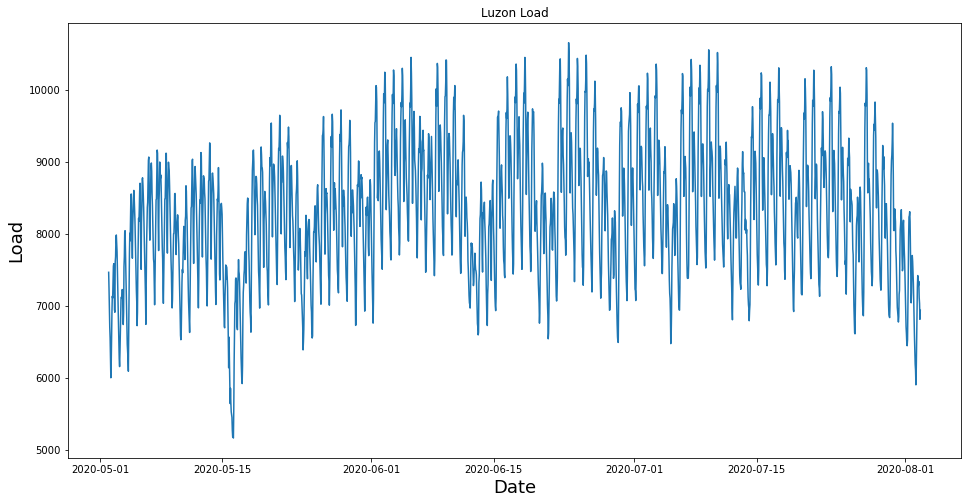

,Date,Period,Value
Date,,,
2020-05-02 00:00:00,2020-05-02 00:00:00,1,7466.0
2020-05-02 01:00:00,2020-05-02 01:00:00,2,7238.1
2020-05-02 02:00:00,2020-05-02 02:00:00,3,6934.5
2020-05-02 03:00:00,2020-05-02 03:00:00,4,6706.9
2020-05-02 04:00:00,2020-05-02 04:00:00,5,6555.9
...,...,...,...
2020-08-02 13:00:00,2020-08-02 13:00:00,14,7340.2
2020-08-02 14:00:00,2020-08-02 14:00:00,15,7115.1
2020-08-02 15:00:00,2020-08-02 15:00:00,16,7032.0


In [3]:
data = pd.read_csv('Volume_Data.csv')
# convert the data type of the column to DateTime
data['Date']= pd.to_datetime(data['Date']) 
print(data.dtypes)

data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.index = data['Date']

plt.figure(figsize=(16, 8))
plt.title('Luzon Load')
plt.plot(data['Value'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load', fontsize=18)
plt.show()

data

In [4]:
# extract data for each period --> period 18
data_split = data#.loc[data['Period'] == 18]
# define input sequence
data_seq_train = data_split.loc[data_split["Date"] <= "2020-07-27"]
data_seq_test = data_split.loc[data_split["Date"] > "2020-07-27"]
data_seq_train

,Date,Period,Value
Date,,,
2020-05-02 00:00:00,2020-05-02 00:00:00,1,7466.0
2020-05-02 01:00:00,2020-05-02 01:00:00,2,7238.1
2020-05-02 02:00:00,2020-05-02 02:00:00,3,6934.5
2020-05-02 03:00:00,2020-05-02 03:00:00,4,6706.9
2020-05-02 04:00:00,2020-05-02 04:00:00,5,6555.9
...,...,...,...
2020-07-26 20:00:00,2020-07-26 20:00:00,21,8647.8
2020-07-26 21:00:00,2020-07-26 21:00:00,22,8579.1
2020-07-26 22:00:00,2020-07-26 22:00:00,23,8288.9


In [5]:
# define input sequence
data_seq_train = list(data_seq_train['Value'])
data_seq_test = list(data_seq_test['Value'])

# data_seq_train

In [6]:
# choose a number of time steps
n_steps = 7
# split into samples
X_train, y_train = split_sequence(data_seq_train, n_steps)
X_test, y_test = split_sequence(data_seq_test, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

print(X_train.shape[0], X_train.shape[1])
# y_test

2055 7


In [7]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_percentage_error'])
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1, batch_size = 32)

Epoch 1/200
2055/2055 [==============================] - 2s 735us/step - loss: 3364930.1618 - mean_absolute_percentage_error: 14.0884
Epoch 2/200
2055/2055 [==============================] - 0s 168us/step - loss: 358777.6757 - mean_absolute_percentage_error: 5.7448
Epoch 3/200
2055/2055 [==============================] - 0s 159us/step - loss: 345013.9535 - mean_absolute_percentage_error: 5.6071
Epoch 4/200
2055/2055 [==============================] - 0s 155us/step - loss: 563395.0991 - mean_absolute_percentage_error: 7.3348
Epoch 5/200
2055/2055 [==============================] - 0s 154us/step - loss: 488403.9677 - mean_absolute_percentage_error: 6.6734
Epoch 6/200
2055/2055 [==============================] - 0s 152us/step - loss: 392316.8302 - mean_absolute_percentage_error: 6.1358
Epoch 7/200
2055/2055 [==============================] - 0s 151us/step - loss: 325576.2286 - mean_absolute_percentage_error: 5.3392
Epoch 8/200
2055/2055 [==============================] - 0s 148us/step - l

2055/2055 [==============================] - 0s 120us/step - loss: 63414.5450 - mean_absolute_percentage_error: 2.3427
Epoch 124/200
2055/2055 [==============================] - 0s 157us/step - loss: 66783.4873 - mean_absolute_percentage_error: 2.4099
Epoch 125/200
2055/2055 [==============================] - 0s 133us/step - loss: 66060.3570 - mean_absolute_percentage_error: 2.3974
Epoch 126/200
2055/2055 [==============================] - 0s 126us/step - loss: 64627.9541 - mean_absolute_percentage_error: 2.3756
Epoch 127/200
2055/2055 [==============================] - 0s 177us/step - loss: 65524.4022 - mean_absolute_percentage_error: 2.4035
Epoch 128/200
2055/2055 [==============================] - 0s 139us/step - loss: 71172.9951 - mean_absolute_percentage_error: 2.5126
Epoch 129/200
2055/2055 [==============================] - 0s 126us/step - loss: 73372.0368 - mean_absolute_percentage_error: 2.5370
Epoch 130/200
2055/2055 [==============================] - 0s 127us/step - loss: 74

In [8]:
# demonstrate prediction
#x_input = array(data_seq_test)
#x_input = x_input.reshape((1, n_steps, n_features))
y_test_hat = model.predict(X_test, verbose=0)
y_test = list(y_test)
for i in range(len(y_test_hat)):
    print(y_test_hat[i]-y_test[i])

[-423.2578]
[-69.81836]
[21.174805]
[278.11914]
[-132.78418]
[-539.5117]
[91.94141]
[87.24121]
[407.54785]
[69.552734]
[-77.33496]
[305.12402]
[385.66895]
[-160.3457]
[150.73047]
[-52.535156]
[-20.39209]
[170.58643]
[31.461914]
[167.50488]
[39.709473]
[125.89746]
[-162.01709]
[-727.29346]
[-91.96387]
[-155.98535]
[166.74414]
[196.6914]
[-350.75586]
[-308.99023]
[123.180664]
[-173.47754]
[381.73242]
[-30.267578]
[-194.7959]
[223.03418]
[203.86816]
[37.38086]
[-61.726562]
[-33.808594]
[60.927734]
[38.175293]
[204.64551]
[98.86426]
[93.57373]
[60.986816]
[-93.58301]
[-547.14014]
[-152.64746]
[-78.34863]
[-218.59863]
[419.6875]
[-76.16797]
[-505.0127]
[161.39258]
[-221.8877]
[362.51514]
[-74.39014]
[-420.44482]
[409.17383]
[-70.20508]
[135.71289]
[-46.730957]
[-170.84619]
[170.77393]
[76.67676]
[216.54248]
[144.12646]
[48.487305]
[75.91943]
[-156.72168]
[-395.6626]
[-502.2036]
[-10.337891]
[116.836914]
[75.7959]
[-189.67188]
[-331.49902]
[245.57812]
[-2.8935547]
[368.93408]
[-116.018555]
[

In [24]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE= mean_absolute_percentage_error(y_test, y_test_hat)
MAPE

13.768324347093438

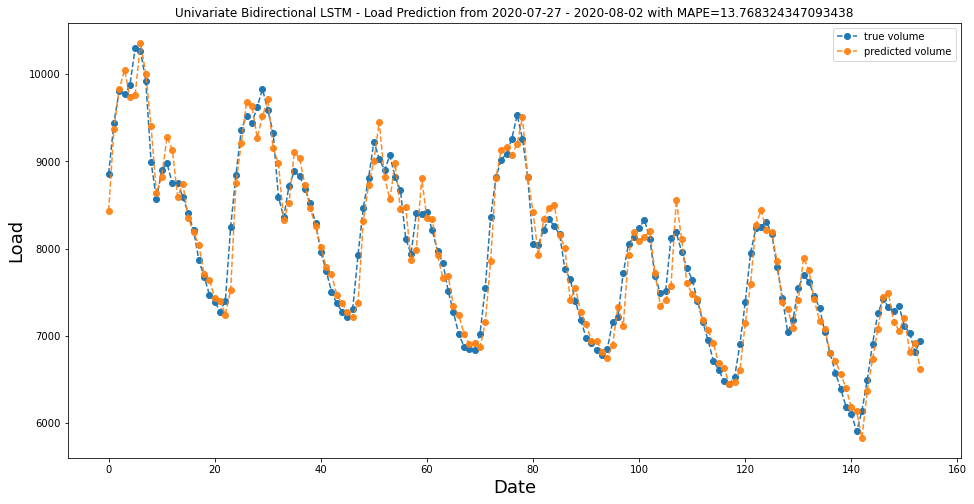

In [26]:
plt.figure(figsize=(16, 8))
plt.title('Univariate Bidirectional LSTM - Load Prediction from 2020-07-27 - 2020-08-02 with MAPE='+ str(MAPE))
plt.plot(y_test, 'o--', alpha=1)
plt.plot(y_test_hat, 'o--', alpha=0.9)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load', fontsize=18)
plt.legend(['true volume', 'predicted volume'], loc='upper right')

plt.show()


In [11]:
len(y_test)

154

In [12]:
y_test[0]

8859.7

# Test on 27 july period 18

In [13]:
real_value_row = data_split.loc[data_split["Date"] == "2020-07-27 17:00:00"]
real_value = real_value_row["Value"]
real_value

Date
2020-07-27 17:00:00    8567.7
Name: Value, dtype: float64

In [14]:
# test data
one_test = array([8377,  8486.7, 8643,  8307.4, 8470.6, 8165.6, 7610.0])
one_test = one_test.reshape((1, n_steps, n_features))
# Prediction On Stacked Model
yhat_Stacked = model.predict(one_test, verbose=1)
yhat_Stacked=yhat_Stacked[0]
yhat_Stacked=yhat_Stacked[0]
yhat_Stacked

1/1 [==============================] - 0s 966us/step


7381.873

In [15]:
real_value-yhat_Stacked

Date
2020-07-27 17:00:00    1185.826953
Name: Value, dtype: float64

In [16]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(real_value, yhat_Stacked)

13.840668477245943

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_hat)    

170.816403713474

In [32]:
import tensorflow as tf
mape1 = tf.keras.losses.MeanAbsolutePercentageError()
mape1(y_test, y_test_hat).numpy()


13.768325